In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from bs4 import BeautifulSoup

In [83]:
session = HTMLSession()
response = session.get('https://natural-resources.canada.ca/our-natural-resources/forests/state-canadas-forests-report/how-much-forest-does-canada-have/17601#')
response.status_code

200

In [84]:
soup = BeautifulSoup(response.text, 'html.parser')

In [85]:
for br in soup.findAll('\n'):
    br.decompose()

In [86]:
tbody = soup.tbody

year = []
forest_area = []

for tr in tbody:
    if len(tr.text) == 14 :
        
        row_data = tr.text.replace('\n', '')
        row_data = row_data.replace(',' , '')
        
        year_data = row_data[0:4]
        forest_data = row_data[4: len(row_data)]
        
        year.append(year_data)
        forest_area.append(forest_data)

In [87]:
# declare dataframe
forest_cover_df = pd.DataFrame()
forest_cover_df['year'] = year
forest_cover_df['forest_area'] = forest_area

In [88]:
# what is the average forest cover in canada?
forest_cover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         32 non-null     object
 1   forest_area  32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [89]:
forest_cover_df['forest_area'] = forest_cover_df['forest_area'].apply(pd.to_numeric)

In [90]:
forest_cover_df['forest_area'].mean()

362492.09375

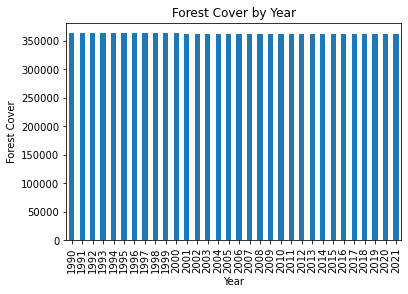

In [91]:
forest_cover_df.plot(kind = 'bar', x = 'year', y = 'forest_area', ylabel = 'Forest Cover', xlabel = 'Year',
                    title = 'Forest Cover by Year', legend = None)
plt.show()

In [92]:
table_all = soup.find_all("table", {"class": "table table-bordered"})